<a href="https://colab.research.google.com/github/ssooyaa/do_it_django_a_to_z/blob/main/0830%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%ED%94%BC%EB%B6%80%EC%95%94_%EC%A2%85%EB%A5%98_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 다운로드

In [ ]:
import numpy as np
import pandas as pd
import os
os.environ['KAGGLE_USERNAME'] = 'ssooya'
os.environ['KAGGLE_KEY'] = '48d791a4e1df6b5b00931525a5da582b'
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [00:22<00:00, 292MB/s]
100% 5.20G/5.20G [00:22<00:00, 243MB/s]


In [ ]:
!unzip '*.zip' #데이터 압축 해제

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_

In [ ]:
df = pd.read_csv('/content/HAM10000_metadata.csv')  #데이터 확인
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df['dx'].value_counts() #질병 종류 및 데이터 갯수 확인

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

이미지 파일 합치기</br>
- 데이터 프레임 연결을 위한 이미지파일 합치기

In [ ]:
os.mkdir('/content/HAM10000_images') #이미지 이동할 파일 생성
import shutil

file_lst1 = os.listdir('/content/HAM10000_images_part_1') 

for file in file_lst1: #종합파일으로 이미지 이동
  shutil.move('/content/HAM10000_images_part_1/'+file, '/content/HAM10000_images/'+file)

In [ ]:
file_lst2 = os.listdir('/content/HAM10000_images_part_2')

for file in file_lst2: #종합파일으로 이미지 이동
  shutil.move('/content/HAM10000_images_part_2/'+file, '/content/HAM10000_images/'+file)

In [ ]:
print(len(os.listdir('/content/HAM10000_images_part_1')),len(os.listdir('/content/HAM10000_images_part_2')),len(os.listdir('/content/HAM10000_images'))) #이동 후 파일 갯수 확인

0 0 10015


In [ ]:
#파일 확장자종류 확인
file=[]
for i in os.listdir('/content/HAM10000_images'):
  k = os.path.splitext(i)[1]
  file.append(k)

set(file)

{'.jpg'}

이미지 경로와 데이터프레임 연결

In [ ]:
DATA_PATH = '/content/HAM10000_images/'
df['image_id'] = DATA_PATH + df['image_id'].apply(lambda x : str(x).replace('\\','/')[:])+'.jpg'

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,/content/HAM10000_images/ISIC_0027419.jpg,bkl,histo,80.0,male,scalp
1,HAM_0000118,/content/HAM10000_images/ISIC_0025030.jpg,bkl,histo,80.0,male,scalp
2,HAM_0002730,/content/HAM10000_images/ISIC_0026769.jpg,bkl,histo,80.0,male,scalp
3,HAM_0002730,/content/HAM10000_images/ISIC_0025661.jpg,bkl,histo,80.0,male,scalp
4,HAM_0001466,/content/HAM10000_images/ISIC_0031633.jpg,bkl,histo,75.0,male,ear


이미지 확인

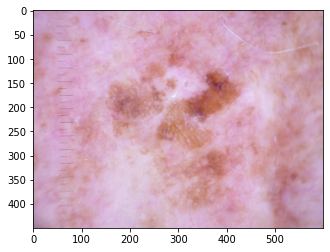

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(df.iloc[0]['image_id'])
plt.imshow(img)

In [ ]:
rf= df.drop(['lesion_id', 'dx_type','age','sex','localization'], axis = 1) 
rf.head()

,image_id,dx
0,/content/HAM10000_images/ISIC_0027419.jpg,bkl
1,/content/HAM10000_images/ISIC_0025030.jpg,bkl
2,/content/HAM10000_images/ISIC_0026769.jpg,bkl
3,/content/HAM10000_images/ISIC_0025661.jpg,bkl
4,/content/HAM10000_images/ISIC_0031633.jpg,bkl


Train, Test, Validation 데이터 프레임 분리


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(rf,test_size=0.3)
train_df, val_df = train_test_split(train_df,test_size=0.3)
print(train_df.shape,test_df.shape,val_df.shape)

(4907, 2) (3005, 2) (2103, 2)


데이터 스케일링 및 전처리

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip=True, shear_range=0.5,brightness_range=[0.5,1.5],zoom_range=0.2,width_shift_range=0.1,height_shift_range=0.1,rotation_range=30,fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, directory=None, x_col='image_id', y_col='dx', target_size=(150,150),color_mode='rgb',class_mode='categorical',batch_size=32,shuffle=True)
val_generator = val_datagen.flow_from_dataframe(dataframe=val_df, directory=None ,x_col='image_id', y_col='dx', target_size=(150,150),color_mode='rgb',class_mode='categorical',batch_size=32,shuffle=True)

Found 4907 validated image filenames belonging to 7 classes.
Found 2103 validated image filenames belonging to 7 classes.


모델 구성</br>
-전이학습(DenseNet169)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet169

dens169 = DenseNet169(weights = 'imagenet', input_shape = (150,150, 3), include_top = False)
model = Sequential()
model.add(dens169)
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu')) 
model.add(Dense(7, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 64)          958528    
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 128)         147584    
                                                        

모델 학습

In [ ]:
history = model.fit(train_generator, epochs = 15, batch_size=32, validation_data = val_generator) 

Epoch 1/15
154/154 [==============================] - 82s 532ms/step - loss: 0.9090 - acc: 0.6766 - val_loss: 0.9632 - val_acc: 0.6795
Epoch 2/15
154/154 [==============================] - 82s 531ms/step - loss: 0.8921 - acc: 0.6794 - val_loss: 1.0625 - val_acc: 0.6724
Epoch 3/15
154/154 [==============================] - 82s 530ms/step - loss: 0.8870 - acc: 0.6847 - val_loss: 0.9037 - val_acc: 0.6824
Epoch 4/15
154/154 [==============================] - 82s 530ms/step - loss: 0.8526 - acc: 0.6906 - val_loss: 0.8383 - val_acc: 0.6781
Epoch 5/15
154/154 [==============================] - 84s 543ms/step - loss: 0.8494 - acc: 0.6915 - val_loss: 0.8283 - val_acc: 0.7033
Epoch 6/15
154/154 [==============================] - 83s 538ms/step - loss: 0.8474 - acc: 0.6915 - val_loss: 0.8585 - val_acc: 0.6733
Epoch 7/15
154/154 [==============================] - 82s 530ms/step - loss: 0.8190 - acc: 0.6935 - val_loss: 1.3216 - val_acc: 0.6700
Epoch 8/15
154/154 [==============================] - 8

학습 과정 그려보기

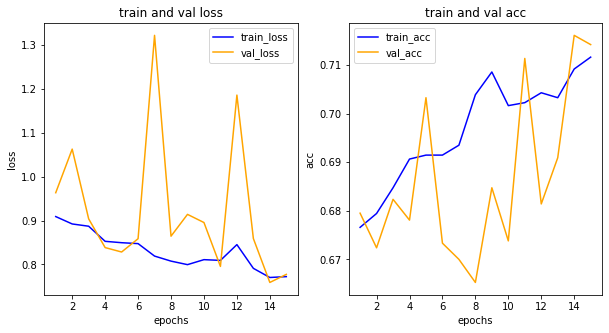

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

테스트 데이터 이미지 스케일링 및 정확도 확인

In [ ]:
#테스트 데이터 이미지 스케일링
test_datagen = ImageDataGenerator(rescale = 1./255) 
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory=None, x_col='image_id', y_col=None, target_size=(150,150),color_mode='rgb',class_mode=None,batch_size=32,shuffle=False)

Found 3005 validated image filenames.


In [ ]:
#테스트 데이터 모델 적용
pred = model.predict(test_generator)


In [ ]:
y_test = pd.get_dummies(test_df['dx'])
y_test.head()
y_true = y_test.to_numpy()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print('\n',classification_report(np.argmax(y_true,axis=-1),np.argmax(pred,axis=-1),target_names=['akiec', 'bcc', 'bkl', 'df', 'me', 'nv', 'vasc']))


               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        96
         bcc       0.47      0.15      0.22       158
         bkl       0.37      0.26      0.30       324
          df       0.00      0.00      0.00        32
          me       0.71      0.10      0.17       327
          nv       0.75      0.99      0.85      2011
        vasc       1.00      0.47      0.64        57

    accuracy                           0.72      3005
   macro avg       0.47      0.28      0.31      3005
weighted avg       0.66      0.72      0.65      3005



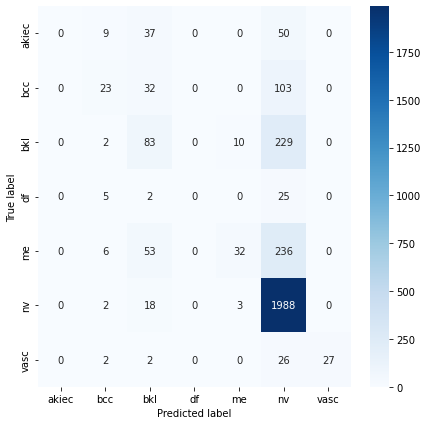

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
label=['akiec', 'bcc', 'bkl', 'df', 'me', 'nv', 'vasc']

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_true,axis=-1),np.argmax(pred,axis=-1))
sns.heatmap(cm,annot=True,fmt = 'd', cmap = 'Blues',xticklabels =label,yticklabels =label)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

모델2 구성</br>
-전이학습(VGG19)

In [ ]:
from tensorflow.keras.applications import VGG19

vgg19 = VGG19(weights = 'imagenet', input_shape = (150, 150, 3), include_top = False)
for layer in vgg19.layers[:-3]:
    layer.trainable = False
model2 = Sequential()
model2.add(vgg19)
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(16, activation = 'relu')) 
model2.add(Dense(7, activation = 'softmax')) 

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               1048704   
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 7)                

In [ ]:
history2 = model2.fit(train_generator, epochs = 15, batch_size=32, validation_data = val_generator) 

Epoch 1/15
154/154 [==============================] - 84s 534ms/step - loss: 1.0237 - acc: 0.6668 - val_loss: 0.9727 - val_acc: 0.6695
Epoch 2/15
154/154 [==============================] - 84s 546ms/step - loss: 0.9268 - acc: 0.6772 - val_loss: 0.8956 - val_acc: 0.6862
Epoch 3/15
154/154 [==============================] - 82s 533ms/step - loss: 0.8641 - acc: 0.6866 - val_loss: 0.8425 - val_acc: 0.6914
Epoch 4/15
154/154 [==============================] - 82s 534ms/step - loss: 0.8550 - acc: 0.6943 - val_loss: 0.8358 - val_acc: 0.7042
Epoch 5/15
154/154 [==============================] - 81s 524ms/step - loss: 0.8301 - acc: 0.7004 - val_loss: 0.8235 - val_acc: 0.7175
Epoch 6/15
154/154 [==============================] - 81s 523ms/step - loss: 0.8148 - acc: 0.7112 - val_loss: 0.8673 - val_acc: 0.7099
Epoch 7/15
154/154 [==============================] - 81s 526ms/step - loss: 0.8163 - acc: 0.7098 - val_loss: 0.8124 - val_acc: 0.7052
Epoch 8/15
154/154 [==============================] - 8

모델2 학습 과정 그려보기

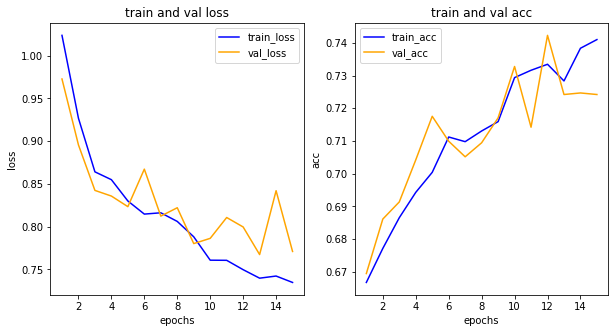

In [ ]:
his_dict = history2.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

테스트 데이터 이미지 스케일링 및 정확도 확인

In [ ]:
#테스트 데이터 이미지 스케일링
test_datagen = ImageDataGenerator(rescale = 1./255) 
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory=None, x_col='image_id', y_col=None, target_size=(150,150),color_mode='rgb',class_mode=None,batch_size=32,shuffle=False)

Found 3005 validated image filenames.


In [ ]:
#테스트 데이터 모델 적용
pred2 = model2.predict(test_generator)
#라벨 리스트 생성
col = sorted(['nv','me','bkl','bcc','akiec','vasc','df'])

In [ ]:
y_test = pd.get_dummies(test_df['dx'])
y_true = y_test.to_numpy()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print('\n',classification_report(np.argmax(y_true,axis=-1),np.argmax(pred2,axis=-1),target_names=['akiec', 'bcc', 'bkl', 'df', 'me', 'nv', 'vasc']))


               precision    recall  f1-score   support

       akiec       0.35      0.20      0.25        96
         bcc       0.33      0.76      0.46       158
         bkl       0.40      0.27      0.32       324
          df       0.00      0.00      0.00        32
          me       0.51      0.28      0.36       327
          nv       0.85      0.92      0.88      2011
        vasc       0.88      0.49      0.63        57

    accuracy                           0.73      3005
   macro avg       0.48      0.42      0.42      3005
weighted avg       0.72      0.73      0.71      3005



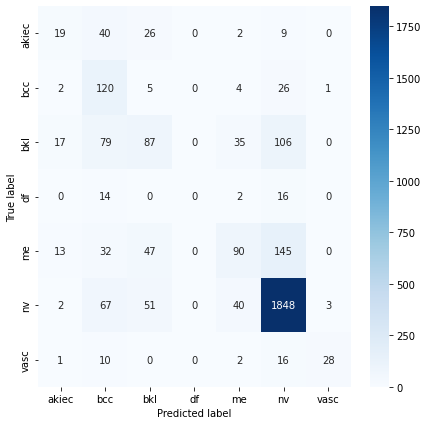

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
label=['akiec', 'bcc', 'bkl', 'df', 'me', 'nv', 'vasc']

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_true,axis=-1),np.argmax(pred2,axis=-1))
sns.heatmap(cm,annot=True,fmt = 'd', cmap = 'Blues',xticklabels =label,yticklabels =label)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
test_df['dx'].value_counts()

nv       2011
mel       327
bkl       324
bcc       158
akiec      96
vasc       57
df         32
Name: dx, dtype: int64

모델3</br>
- InceptionResNetV2 이용

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

incept2 = InceptionResNetV2(weights = 'imagenet', input_shape = (150, 150, 3), include_top = False)
for layer in incept2.layers[:-4]:
    layer.trainable = False
model3 = Sequential()
model3.add(incept2)
model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(16, activation = 'relu')) 
model3.add(Dense(7, activation = 'softmax')) 

model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

219070464/219055592 [==============================] - 6s 0us/step


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 13824)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                884800    
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 7)                 119       
                                                      

모델3 학습

In [ ]:
history3 = model3.fit(train_generator, epochs = 15, batch_size=32, validation_data = val_generator) 

Epoch 1/15
154/154 [==============================] - 95s 557ms/step - loss: 0.9794 - acc: 0.6817 - val_loss: 0.8750 - val_acc: 0.7095
Epoch 2/15
154/154 [==============================] - 84s 545ms/step - loss: 0.8285 - acc: 0.7192 - val_loss: 0.8603 - val_acc: 0.7142
Epoch 3/15
154/154 [==============================] - 82s 531ms/step - loss: 0.7685 - acc: 0.7341 - val_loss: 0.7939 - val_acc: 0.7147
Epoch 4/15
154/154 [==============================] - 82s 532ms/step - loss: 0.7451 - acc: 0.7394 - val_loss: 0.7718 - val_acc: 0.7214
Epoch 5/15
154/154 [==============================] - 84s 547ms/step - loss: 0.7163 - acc: 0.7424 - val_loss: 0.7308 - val_acc: 0.7475
Epoch 6/15
154/154 [==============================] - 84s 543ms/step - loss: 0.6862 - acc: 0.7483 - val_loss: 0.7390 - val_acc: 0.7361
Epoch 7/15
154/154 [==============================] - 82s 534ms/step - loss: 0.6734 - acc: 0.7583 - val_loss: 0.7140 - val_acc: 0.7589
Epoch 8/15
154/154 [==============================] - 8

모델3 학습 시각화

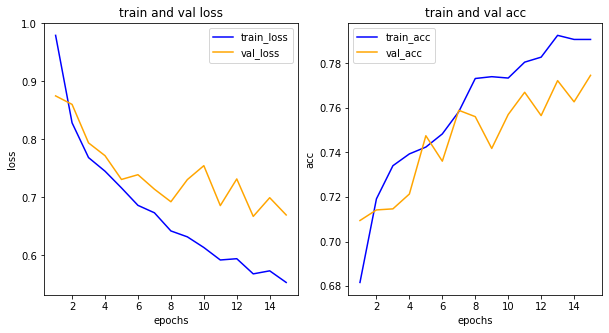

In [ ]:
his_dict = history3.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델3 테스트 정확도 시각화

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255) 
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, directory=None, x_col='image_id', y_col=None, target_size=(150,150),color_mode='rgb',class_mode=None,batch_size=32,shuffle=False)

Found 3005 validated image filenames.


In [ ]:
pred3 = model3.predict(test_generator)
y_test = pd.get_dummies(test_df['dx'])
y_true = y_test.to_numpy()

In [ ]:
print('\n',classification_report(np.argmax(y_true,axis=-1),np.argmax(pred3,axis=-1),target_names=['akiec', 'bcc', 'bkl', 'df', 'me', 'nv', 'vasc']))


               precision    recall  f1-score   support

       akiec       0.63      0.20      0.30        96
         bcc       0.56      0.57      0.56       158
         bkl       0.48      0.56      0.52       324
          df       0.42      0.16      0.23        32
          me       0.53      0.24      0.33       327
          nv       0.85      0.94      0.89      2011
        vasc       0.83      0.68      0.75        57

    accuracy                           0.77      3005
   macro avg       0.61      0.48      0.51      3005
weighted avg       0.75      0.77      0.75      3005



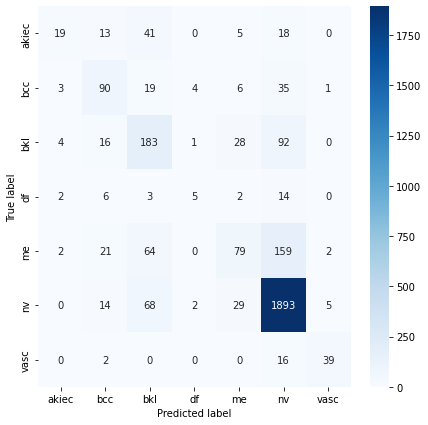

In [ ]:
label=['akiec', 'bcc', 'bkl', 'df', 'me', 'nv', 'vasc']

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_true,axis=-1),np.argmax(pred3,axis=-1))
sns.heatmap(cm,annot=True,fmt = 'd', cmap = 'Blues',xticklabels =label,yticklabels =label)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()